In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from data_reconstruct import *
from data_reconstruct.backend import *
from data_reconstruct.utilities import *

In [3]:
np.random.seed(42)

# Generate Data

In [4]:
mod1, relationship, mod2, mod2_training, mod2_validation, split_idx = generate_data()
print(mod1[:5], relationship, mod2[:5], sep='\n\n')

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]]

[[0.69816171 0.53609637 0.30952762]
 [0.81379502 0.68473117 0.16261694]
 [0.91092718 0.82253724 0.94979991]
 [0.72571951 0.6134152  0.41824304]
 [0.93272848 0.86606389 0.04521867]]

[[2.28195049 1.95621392 1.22322024]
 [2.04188131 1.81783107 1.16385429]
 [1.88566571 1.64760193 1.05178043]
 [1.43876037 1.25546303 0.79848431]
 [1.49807958 1.28354543 0.66339956]]


# Realistic Implementation

In practice, the below code is all that needs to be run to use the pipeline

In [5]:
pipeline_output = run_pipeline(mod1, mod2, train_idx=split_idx)

use random seed: 666
Shape of Raw data
Dataset 0: (100, 5)
Dataset 1: (80, 3)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[100/2000] err:0.0897 alpha:0.1564
epoch:[200/2000] err:0.0940 alpha:0.1640
epoch:[300/2000] err:0.0942 alpha:0.1645
epoch:[400/2000] err:0.0944 alpha:0.1650
epoch:[500/2000] err:0.0945 alpha:0.1654
epoch:[600/2000] err:0.0946 alpha:0.1658
epoch:[700/2000] err:0.0947 alpha:0.1662
epoch:[800/2000] err:0.0948 alpha:0.1665
epoch:[900/2000] err:0.0948 alpha:0.1669
epoch:[1000/2000] err:0.0948 alpha:0.1671
epoch:[1100/2000] err:0.0948 alpha:0.1674
epoch:[1200/2000] err:0.0948 alpha:0.1677
epoch:[1300/2000] err:0.0947 alpha:0.1679
epoch:[1400/2000] err:0.0947 alpha:0.1681
epoch:[1500/2000] err:0.0946 alpha:0.1683
epoch:[1600/2000] err:0.0945 alpha:0.1685
epoch:[1700/2000] err:0.0944 alpha:0.1687
epoch:[1800/2000] err:0.0943 alpha:0.1689
epoch:[1900/2000] err:0.0941 alpha:0.1690
epoch:[2000/2000] err:0.0940 al

# Verbose Implementation

Since the above code doesn't explain much, the code below can be examined for a better view of the pipeline

## Create Joint Embedding

In [6]:
embedding_dim = 10
joint_embedding = joint_embed(mod1, mod2_training, output_dim=embedding_dim, project_mode='tsne')

use random seed: 666
Shape of Raw data
Dataset 0: (100, 5)
Dataset 1: (80, 3)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[100/2000] err:0.0897 alpha:0.1564
epoch:[200/2000] err:0.0940 alpha:0.1640
epoch:[300/2000] err:0.0942 alpha:0.1645
epoch:[400/2000] err:0.0944 alpha:0.1650
epoch:[500/2000] err:0.0945 alpha:0.1654
epoch:[600/2000] err:0.0946 alpha:0.1658
epoch:[700/2000] err:0.0947 alpha:0.1662
epoch:[800/2000] err:0.0948 alpha:0.1665
epoch:[900/2000] err:0.0948 alpha:0.1669
epoch:[1000/2000] err:0.0948 alpha:0.1671
epoch:[1100/2000] err:0.0948 alpha:0.1674
epoch:[1200/2000] err:0.0948 alpha:0.1677
epoch:[1300/2000] err:0.0947 alpha:0.1679
epoch:[1400/2000] err:0.0947 alpha:0.1681
epoch:[1500/2000] err:0.0946 alpha:0.1683
epoch:[1600/2000] err:0.0945 alpha:0.1685
epoch:[1700/2000] err:0.0944 alpha:0.1687
epoch:[1800/2000] err:0.0943 alpha:0.1689
epoch:[1900/2000] err:0.0941 alpha:0.1690
epoch:[2000/2000] err:0.0940 al

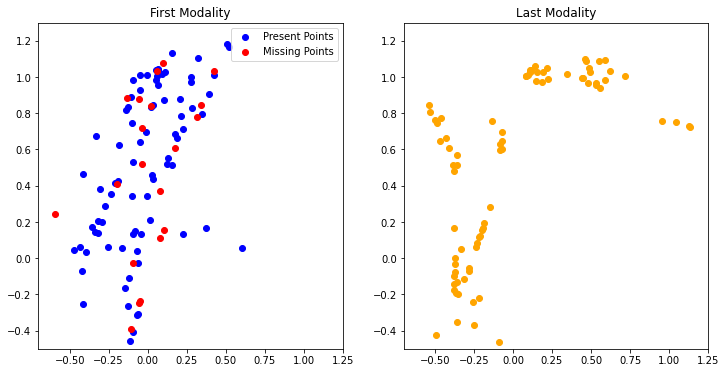

In [7]:
plt.subplots(figsize=(12, 6))
plot_example_embedding(joint_embedding, split_idx, axis_bounds=[-.7, 1.25, -.5, 1.3])

## Predict Feature in Second Modality

In [8]:
output_dim = 1
training_loader = create_dataloader(joint_embedding[0][:split_idx], mod2_training[:, :output_dim])
validation_loader = create_dataloader(joint_embedding[0][split_idx:], mod2_validation[:, :output_dim])
model = Model(embedding_dim, output_dim)
train_model(model, training_loader)

Epoch:  10    Loss:  0.11790
Epoch:  20    Loss:  0.10872
Epoch:  30    Loss:  0.10488
Epoch:  40    Loss:  0.10183
Epoch:  50    Loss:  0.09943
Epoch:  60    Loss:  0.09758
Epoch:  70    Loss:  0.09612
Epoch:  80    Loss:  0.09497
Epoch:  90    Loss:  0.09404
Epoch: 100    Loss:  0.09328


# Evaluate Results

In [9]:
run_validation(model, validation_loader)

Validation Loss: 0.09591


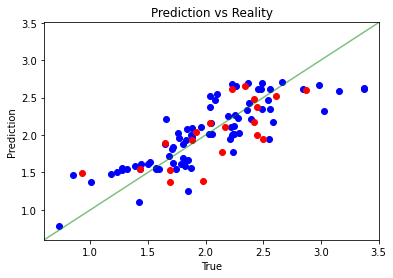

In [10]:
labels = mod2[:, :1]
logits = model(torch.Tensor(joint_embedding[0])).detach().numpy()
plot_example_results(labels, logits, split_idx)